# Code Assigment 1

For this assignment you will use the following SVM implementation for classifying these datasets:
https://archive.ics.uci.edu/ml/datasets/banknote+authentication


https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

You should:

1) Specify which Machine Learning problem are you solving.

2) Provide a short summary of the features and the labels you are working on.

3) Please answer the following questions: a) Are these datasets linearly separable? b) Are these datasets randomly chosen and c) The sample size is enough to guarantee generalization.

4) Provide an explanation how and why the code is working. You can add comments and/or formal explanations into the notebook.

5) Show some examples to illustrate that the method is working properly.

6) Provide quantitative evidence for generalization using the provided dataset.


#Introduction

Through the following datasets we are going to explore the functionality of a Support Vector Machine (SVM). The objetive is to perform, and study, a binary classification task. Recall that an SVM is a supervised Machine Learning algorithm used for classification and regression tasks. Its goal is to separate data points into classes based on their features. The separation process works using a hyperplane found by means of the maximization of the distance between the closest data points of each class. Althought an SVM has several limitations, its advantages allow us to perform this particular classification task effectively. 

The first dataset are values of images taken from genuine forged banknotes. The classification task we are trying to solve is determine whether a banknote is counterfit or not. In this dataset we find 1372 instances, 4 features and a target. The 4 features we are working with are: Variance of Wavelet Transformed Image, Skewness of Wavelet Transformed image, Curtosis of Wavelet Transformed image, Entropy of Image. 

The second dataset are values from time stamped pictures taken every minute from a room giving information regarding temperature, humidity, light, and CO2. The number of instances in the dataset is 20560, and the number of features is 7, which are: date-time-year-month-day hour:minute:second, temperature (in celsius degrees), percentage of relative humidity, light measured in lux, CO2 measuredin ppm, humidty ratio in kgwater-vapor/kg-air, and occupancy. 

# Libraries

In [ ]:
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/

# Numpy & pandas
import numpy as np
import pandas as pd
import missingno as mn
from random import sample
from numpy.random import uniform
from math import isnan

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style

# Seaborn
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline
from matplotlib import rcParams


# Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.tools import FigureFactory as FF
from plotly import tools
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

from IPython.display import display, HTML
init_notebook_mode(connected=True)
 
  
# SKLearn
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.spatial import ConvexHull
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# SciPy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Setting up the view options
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
style.use('ggplot')

np.random.seed(42)

# Banknote Authentication Data Set

## Importing Data

In [ ]:
#Save the dataset in such a way that we can call any feature
bank_note = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", 
                 sep = ',', 
                 header = None, 
                 names = ['variance', 'skewness', 'curtosis', 'entropy', 'class'],
                 thousands = ',')

print('Dimensionality of the Dataframe:', bank_note.shape)

Dimensionality of the Dataframe: (1372, 5)


In [ ]:
bank_note.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [ ]:
bank_note_target = bank_note['class']
bank_note_X = bank_note.drop(['class'], axis = 1)

bank_note_X.head(10)

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.80730,-0.44699
1,4.54590,8.1674,-2.45860,-1.46210
2,3.86600,-2.6383,1.92420,0.10645
3,3.45660,9.5228,-4.01120,-3.59440
4,0.32924,-4.4552,4.57180,-0.98880
5,4.36840,9.6718,-3.96060,-3.16250
6,3.59120,3.0129,0.72888,0.56421
7,2.09220,-6.8100,8.46360,-0.60216
8,3.20320,5.7588,-0.75345,-0.61251
9,1.53560,9.1772,-2.27180,-0.73535


### Data Visualization

In order to have a better understanding on the dataset and its behaviour we visualize it.

### Correlation Heatmap

First of all, with the aid of a correlation matrix, we visualize how each feature its related with the others.

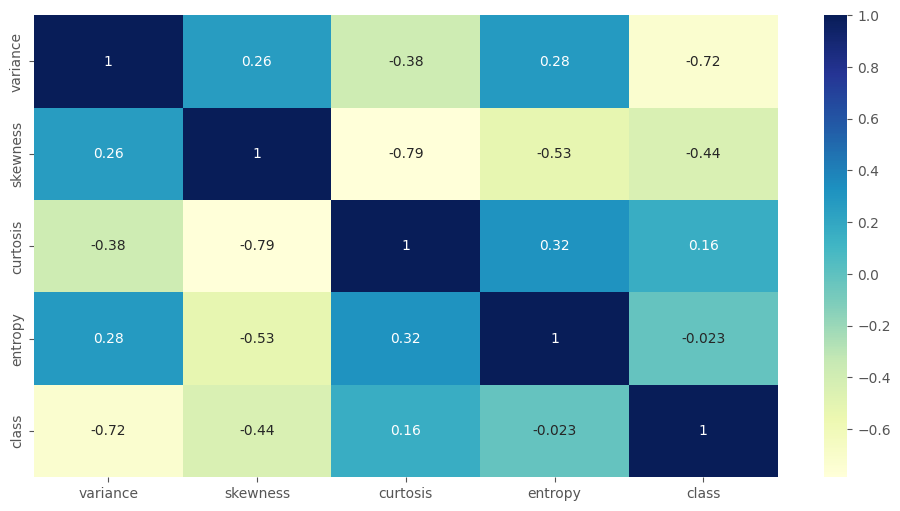

In [ ]:
rcParams['figure.figsize'] = 12,6
sns.heatmap(bank_note.corr(), annot=True, cmap="YlGnBu")
plt.show()

### Box Plot

Now, to have a brief summary of the distribution of the variables, their key statisticals measures, and to gain some insight in on its behaviour, we use a blox-and-whiskers plot

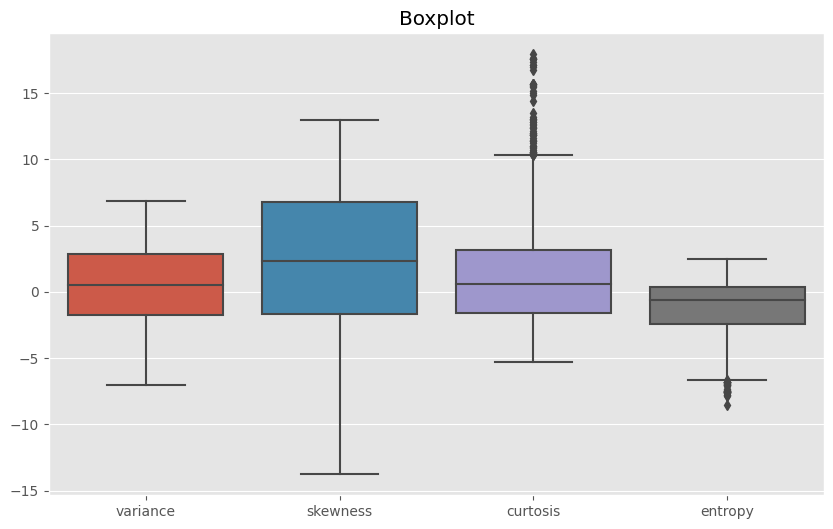

In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=bank_note[['variance', 'skewness', 'curtosis', 'entropy']])
plt.title('Boxplot')
plt.show()

### Violin plot

Looking for visualizing the comparison between the distribution of the data, we use a violin plot for gaining more insight in our dataset

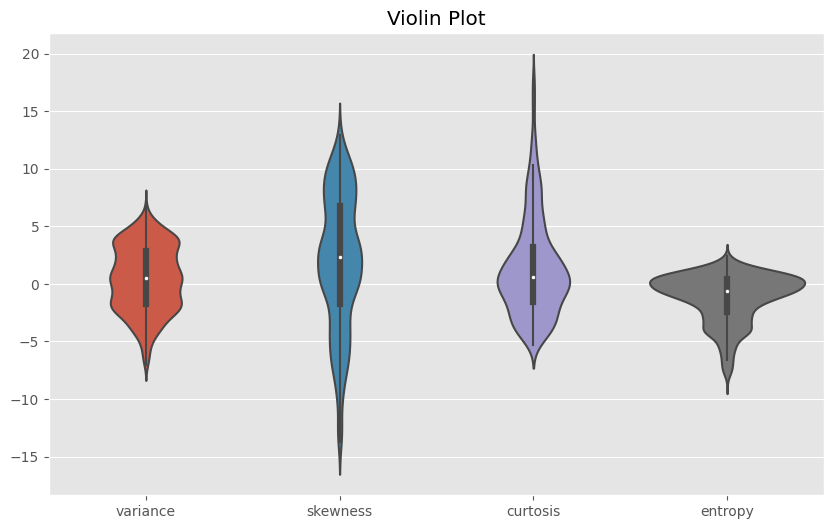

In [ ]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=bank_note[['variance', 'skewness', 'curtosis', 'entropy']])
plt.title('Violin Plot')
plt.show()

### Pairplot Graph

Finally, we'll use a pairwise plot to summarize all of the above information differentiatiing between the two classes

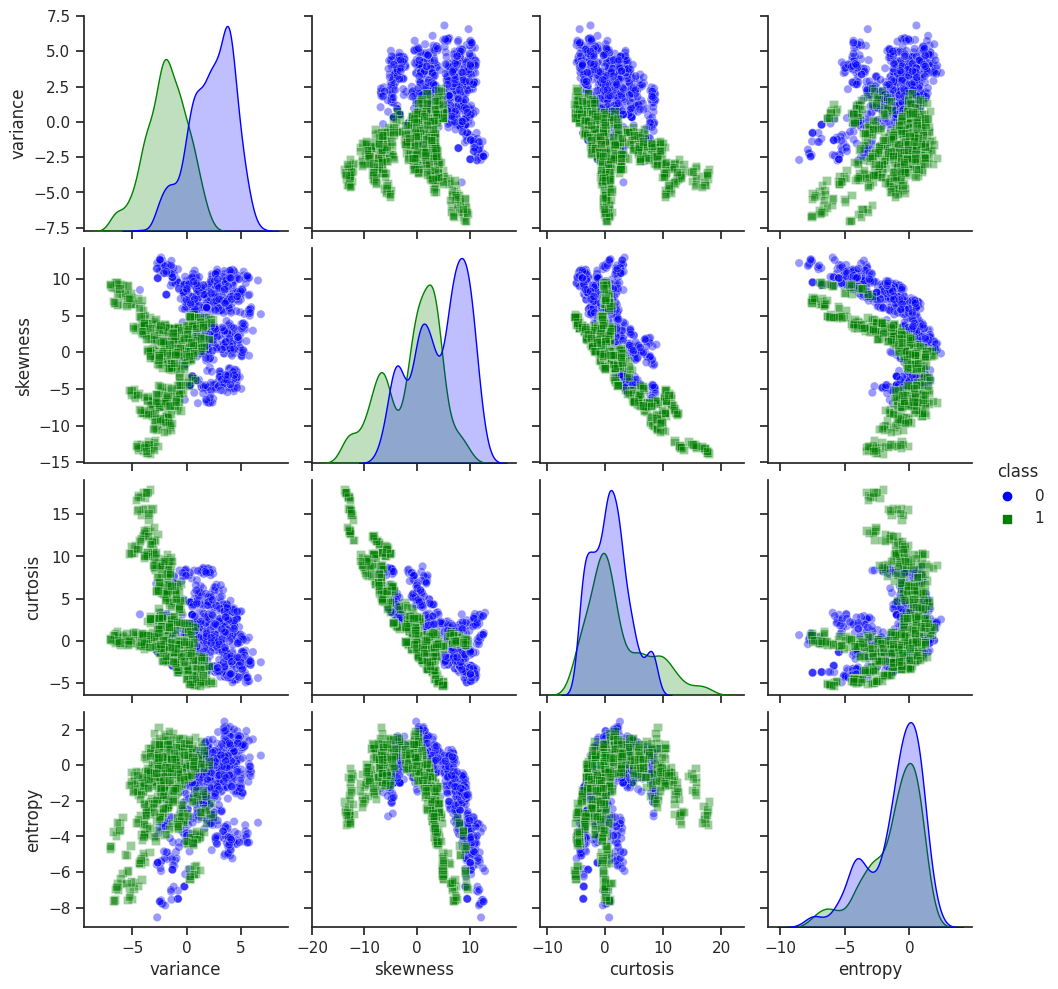

In [ ]:
sns.set(style="ticks")

# Convert the class column to string format
bank_note['class'] = bank_note['class'].astype(str)

# Define a custom color palette
custom_palette = {'0': 'blue', '1': 'green'}

# Create the pairplot with the custom color palette
sns.pairplot(bank_note, hue="class", plot_kws={'alpha': 0.4, 'marker': 'o'}, markers=["o", "s"], palette=custom_palette)

plt.show()

## Linear Separabillity

In this section we will address the question if whether or not this dataset is linearly separable. First of all, and taking into account that we are working with an SVM, we will implement this model to analyze the linear separability. As explained above, the SVM looks for a hyperplane that classifies data. If we get an outstanding accuracy throghout the implementation we can infer that the data can be linearly separable. In (Cortes, C., & Vapnik, V. (1995)) you will find more information regarding why an SVM gives us insights on this issue. 

It is important to note that there is no guarantee on the linear separability of data. This occurs since every dataset has a unique distribution and complexity. Also, as there is no perfect model for an specific dataset, it will depend on the model one uses to test. In this notebook we will implement a Perceptron an a Convex Hull, other than an SVM, to compare and contrast the results. 

### SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bank_note_X, bank_note_target, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_train, y_train)

bank_note_pred = svm.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, bank_note_pred)
print('Accuracy: %.2f' % accuracy)

Precisión: 0.99


### Convex Hull

Implementing the Convex Hull method through after performing a PCA will gives us information about the lienar separability since after performing a PCA we get, within the principal components, the maximum variance of the data in decrasing order of importance. By applying the Convex Hull method to the principal components we can visualize the shape and distribution of the data. If the data is linearly separable there exists a boundary that separates the data effectively. For more information on how the PCA works see Jolliffe, I. T. (2011)

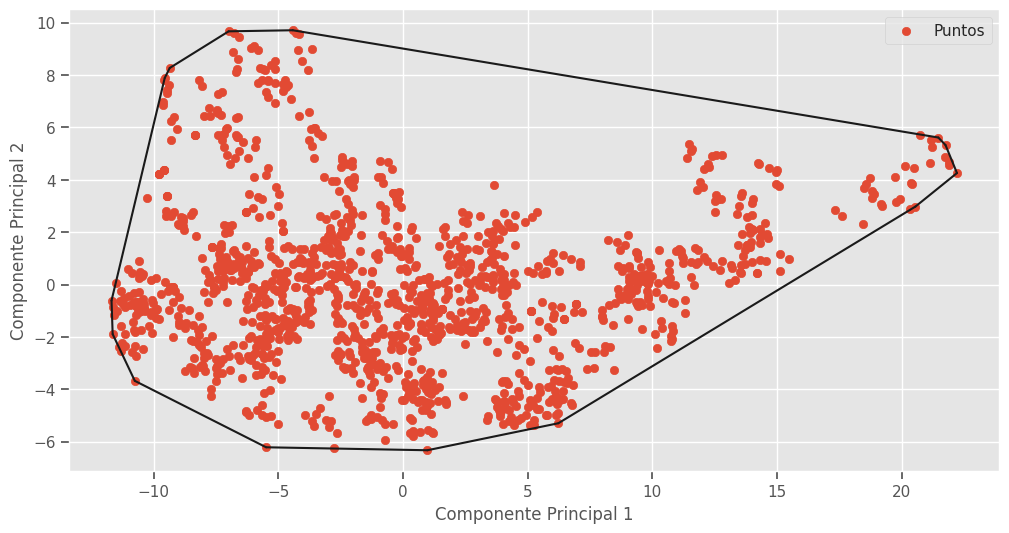

In [ ]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(bank_note_X)

# Calcular la envoltura convexa de los datos proyectados
hull = ConvexHull(data_2d)

# Graficar los puntos y la envoltura convexa
plt.scatter(data_2d[:, 0], data_2d[:, 1], label='Puntos')
for simplex in hull.simplices:
    plt.plot(data_2d[simplex, 0], data_2d[simplex, 1], 'k-')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### Perceptron

In [ ]:
#Creamos el Perceptron
perceptron = Perceptron(eta0=0.1, max_iter=100)

#Pasamos los datos de entrenamiento
perceptron.fit(X_train, y_train)

#Pasamos los datos de testeo
input_vector = [[0, 1]]
y_test = perceptron.predict(X_test)
#print(y_test)

#Meedimos la precisión
training_predictions = perceptron.predict(X_train)
accuracy = accuracy_score(y_train, training_predictions)
print(accuracy)

0.96718322698268


### Is the data linearly separable or not?

After comparing all three of the implemented methods, and in view of the fact that the accuracy of the perceptron and the SVM methods were over 90% we can conclude that this dataset is lienarly separable. 

# Occupancy Detection Data Set

## Importing Data

In [ ]:
from pathlib import Path
import urllib.request
import zipfile
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

def load_occupancy_data():
    tarball_path = Path("datasets/occupancy_data.zip")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip"
        urllib.request.urlretrieve(url, tarball_path)
        with zipfile.ZipFile(tarball_path) as occupancy_tarball:
           # open the csv file in the dataset
           occupancy_tarball.extractall(path="datasets")
    list_df =[pd.read_csv(Path("datasets/datatraining.txt"),parse_dates=['date'],date_parser=dateparse),
              pd.read_csv(Path("datasets/datatest.txt"),parse_dates=['date'],date_parser=dateparse),
              pd.read_csv(Path("datasets/datatest2.txt"),parse_dates=['date'],date_parser=dateparse),]
    return list_df

occupancy_train, occupancy_test1, occupancy_test2 = load_occupancy_data()

## Data Visualization and EDA

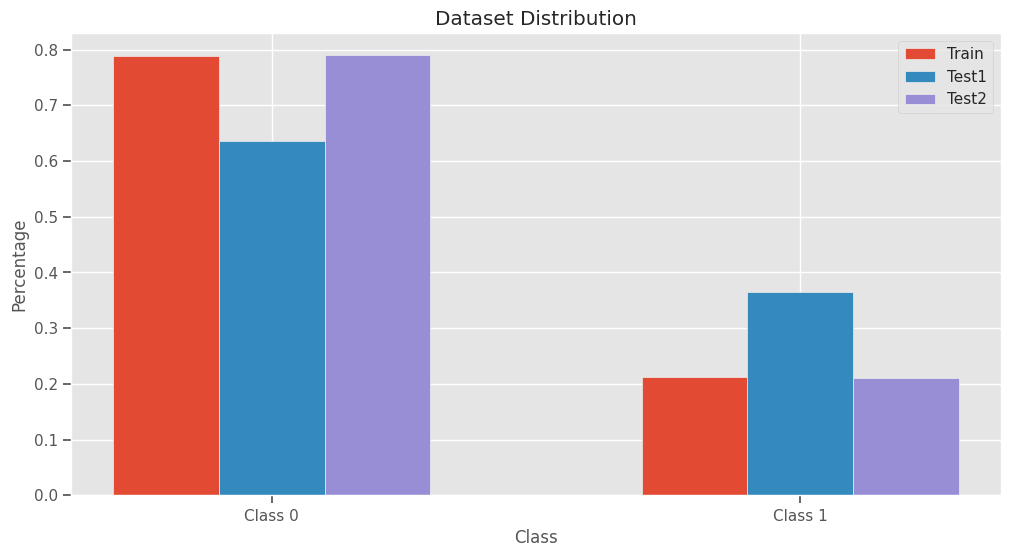

In [ ]:
from tabulate import tabulate

class_train = occupancy_train['Occupancy'].value_counts(normalize=True)
class_test1 = occupancy_test1['Occupancy'].value_counts(normalize=True)
class_test2 = occupancy_test2['Occupancy'].value_counts(normalize=True)

data = [["train", occupancy_train.shape[0], class_train[0], class_train[1]], ["test1", occupancy_test1.shape[0], class_test1[0], class_test1[1]], ["test1", occupancy_test2.shape[0], class_test2[0], class_test2[1]]]

class_train = occupancy_train['Occupancy'].value_counts(normalize=True)
class_test1 = occupancy_test1['Occupancy'].value_counts(normalize=True)
class_test2 = occupancy_test2['Occupancy'].value_counts(normalize=True)

labels = ['Class 0', 'Class 1']
train_percentages = [class_train[0], class_train[1]]
test1_percentages = [class_test1[0], class_test1[1]]
test2_percentages = [class_test2[0], class_test2[1]]

x = range(len(labels))
width = 0.2

plt.bar(x, train_percentages, width, label='Train')
plt.bar([val + width for val in x], test1_percentages, width, label='Test1')
plt.bar([val + 2*width for val in x], test2_percentages, width, label='Test2')

plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Dataset Distribution')
plt.xticks([val + width for val in x], labels)
plt.legend()
plt.show()

This gives an insight: there is an imbalance in classes. Data imbalance is a problem since it can not only bias the model, but it can limit generalization. There are several techniques to mitigate the impact of this issue, one will be explored in later notebooks: F1 score. 

In [ ]:
occupancy_train_copy = occupancy_train.copy()
occupancy_train_copy['date'] = pd.to_datetime(occupancy_train_copy['date'])

In [ ]:
occupancy_train_copy = occupancy_train_copy.set_index('date')

In [ ]:
occupancy_train_copy.index.min(), occupancy_train_copy.index.max()

(Timestamp('2015-02-04 17:51:00'), Timestamp('2015-02-10 09:33:00'))

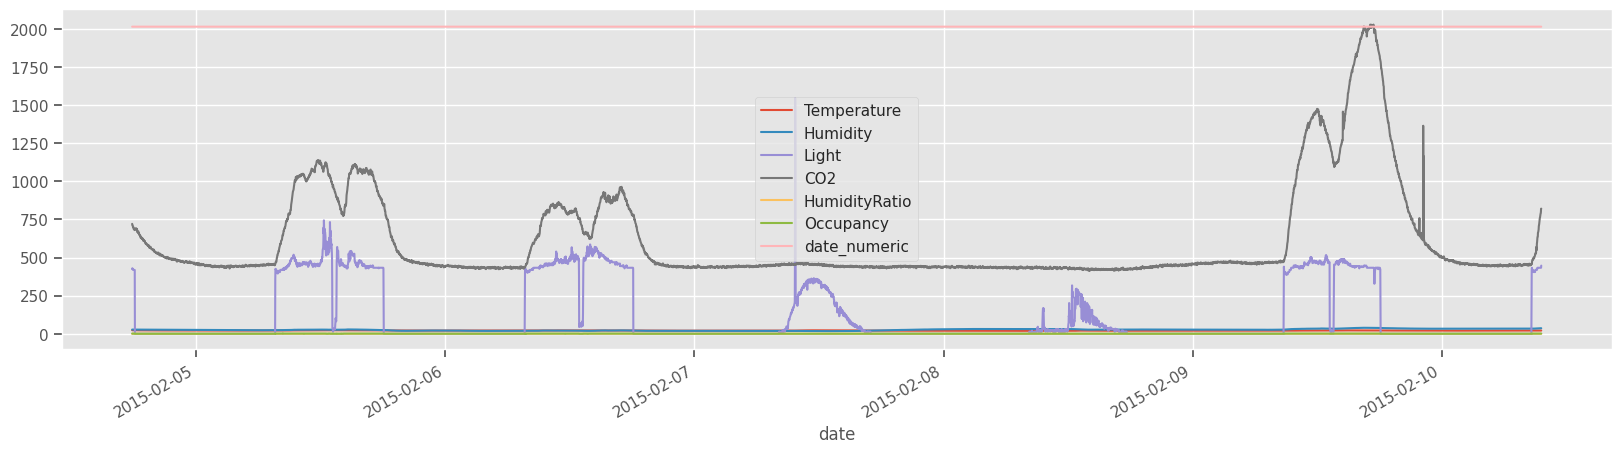

In [ ]:
plt.rcParams['figure.figsize'] = 20, 5
occupancy_train_copy.plot()
plt.show()

This grapgh gives us an idea on how the dataset is behaving with respect to the dates. 

As seen above, the variable date is not numerical. To implement all the different algorithms we must convert it to numerical values. 

In [ ]:
occupancy_train['date_numeric'] = occupancy_train['date'].apply(lambda time: time.year+time.month/12+ time.day/365 + time.hour/8760+time.minute/525600)
occupancy_test1['date_numeric'] = occupancy_test1['date'].apply(lambda time: time.year+time.month/12+ time.day/365 + time.hour/8760+time.minute/525600)
occupancy_test2['date_numeric'] = occupancy_test2['date'].apply(lambda time: time.year+time.month/12+ time.day/365 + time.hour/8760+time.minute/525600)

With these we can perform, through the same analysis we did with the other dataset, how do the variable distributions behave with respect to one another. 

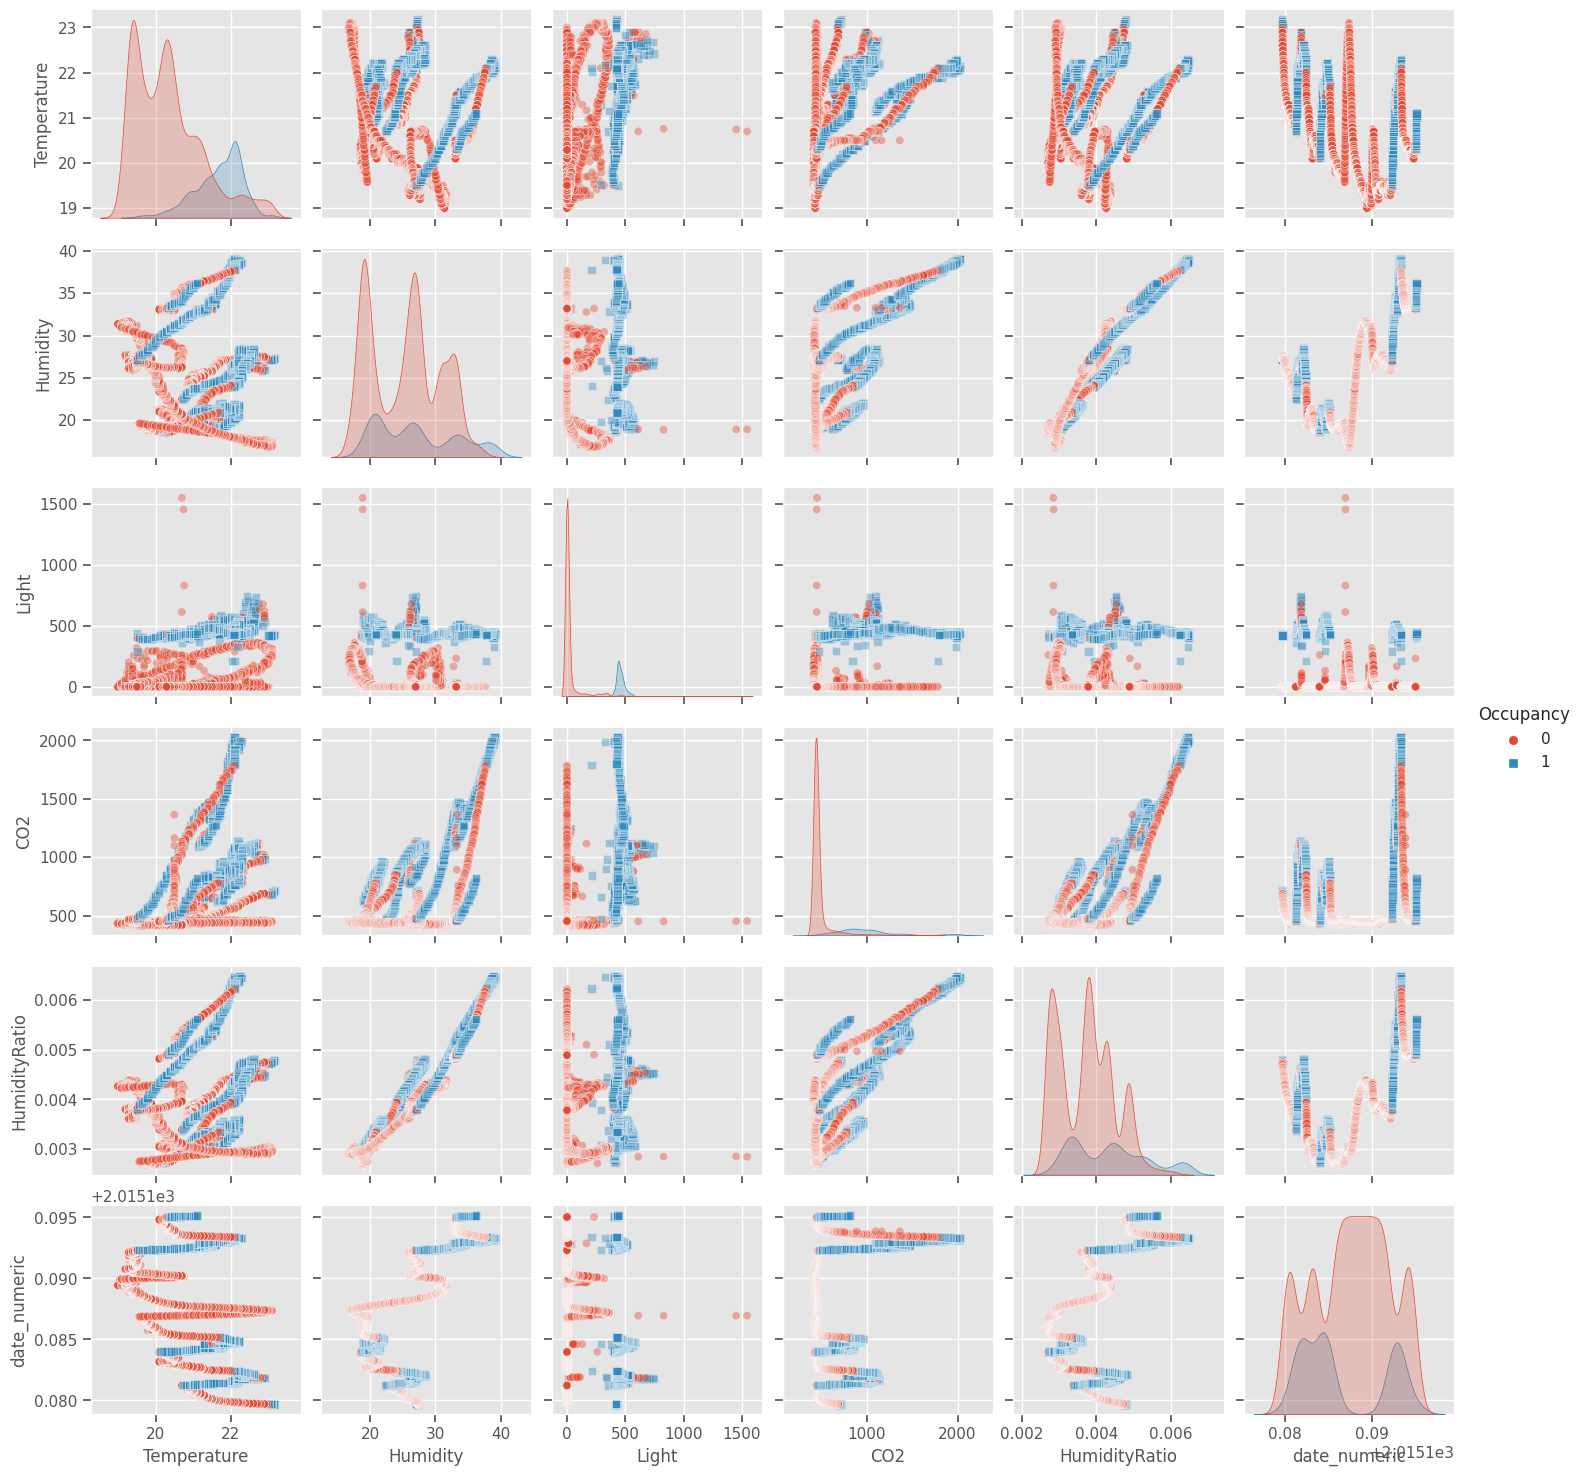

In [ ]:
#Scatter matrix
sns.pairplot(occupancy_train, hue='Occupancy',plot_kws={'alpha':0.4},markers=["o", "s"])
plt.show()

### Preprocessing

Before we implent all the models let us split the data and prepare it. Since we already have splitted the data above, we will only specify certain features. 

In [ ]:
variables_occupancy = ['date_numeric', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

X_train_o = occupancy_train[['date_numeric', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
y_train_o = occupancy_train['Occupancy']

X_test1_o = occupancy_test1[['date_numeric', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
y_test1_o = occupancy_test1['Occupancy']

X_test2_o = occupancy_test2[['date_numeric', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
y_test2_o = occupancy_test2['Occupancy']

## Implementation

### SVM

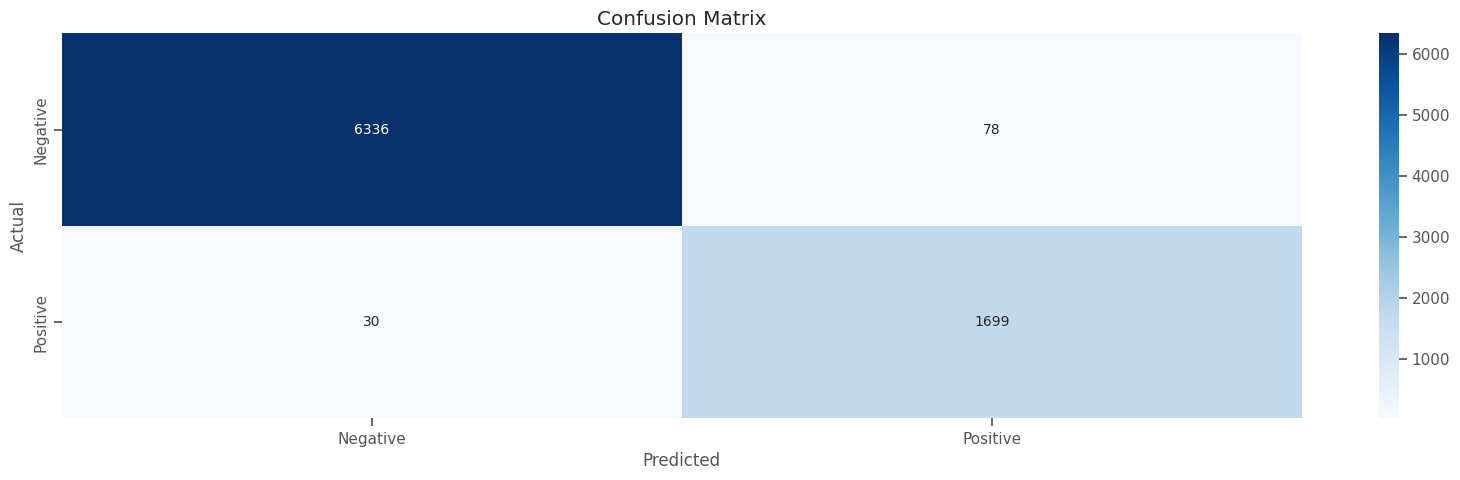

Accuracy: 0.99
Confusion matrix train set:
 [[6336   78]
 [  30 1699]]


In [ ]:
clf= svm.SVC()

clf.fit(X_train_o, y_train_o)

predicted_svm_train_o= clf.predict(X_train_o)
predicted_svm_test1_o=clf.predict(X_test1_o)
predicted_svm_test2_o=clf.predict(X_test2_o)

#Accuracy measure for the training set
accuracy_train_o= accuracy_score(y_train_o, predicted_svm_train_o).round(2)
conf_matrix_train_o= confusion_matrix(y_train_o, predicted_svm_train_o)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_train_o, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# Display the plot
plt.show()

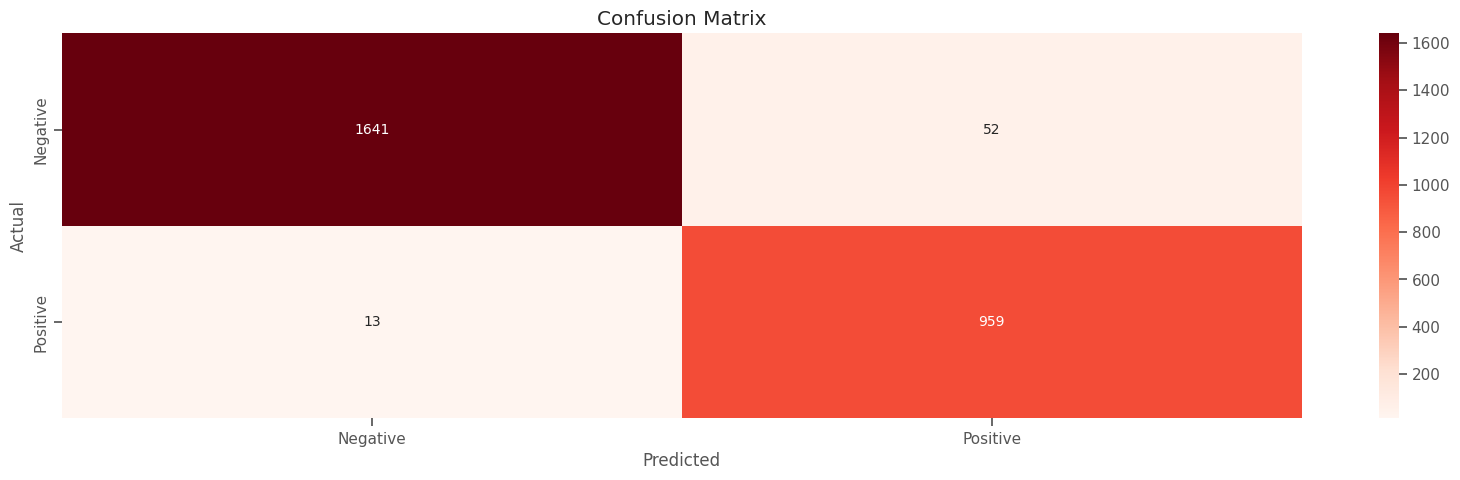

In [ ]:
accuracy_test1_o= accuracy_score(y_test1_o, predicted_svm_test1_o).round(2)
conf_matrix_test1_o= confusion_matrix(y_test1_o, predicted_svm_test1_o)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_test1_o, annot=True, cmap='Reds', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# Display the plot
plt.show()

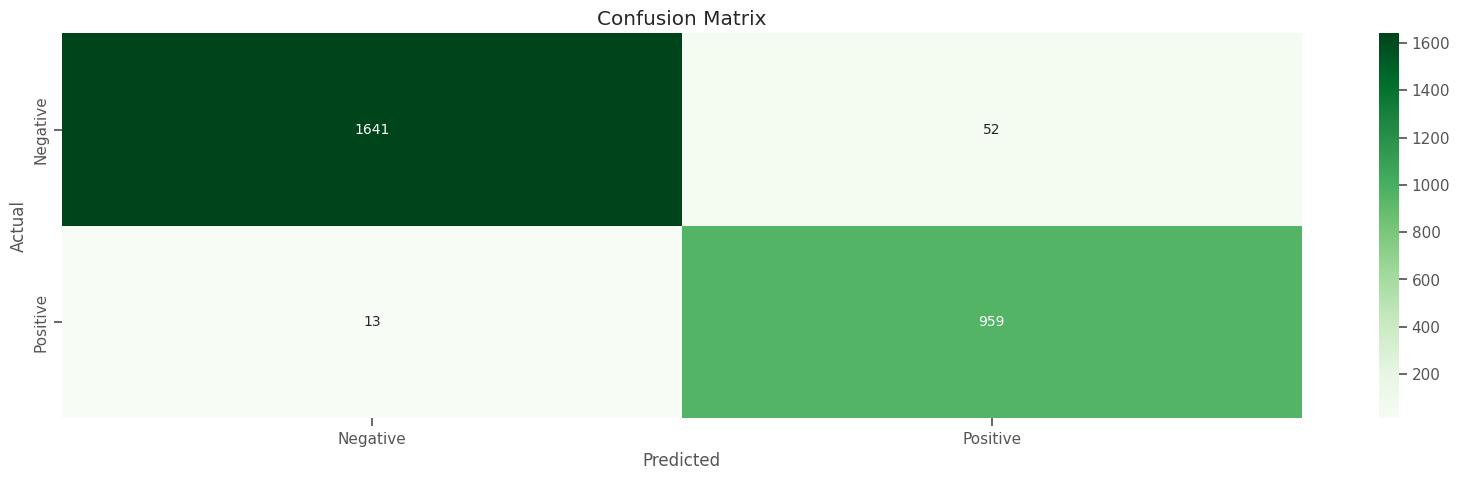

In [ ]:
accuracy_test2_o= accuracy_score(y_test1_o, predicted_svm_test1_o).round(2)
conf_matrix_test2_o= confusion_matrix(y_test1_o, predicted_svm_test1_o)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_test2_o, annot=True, cmap='Greens', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# Display the plot
plt.show()

Although we have a high accuracy (98%), this model presents more false positives than false negatives, an issue concerning the imbalance problem we saw previously.

### Convex Hull

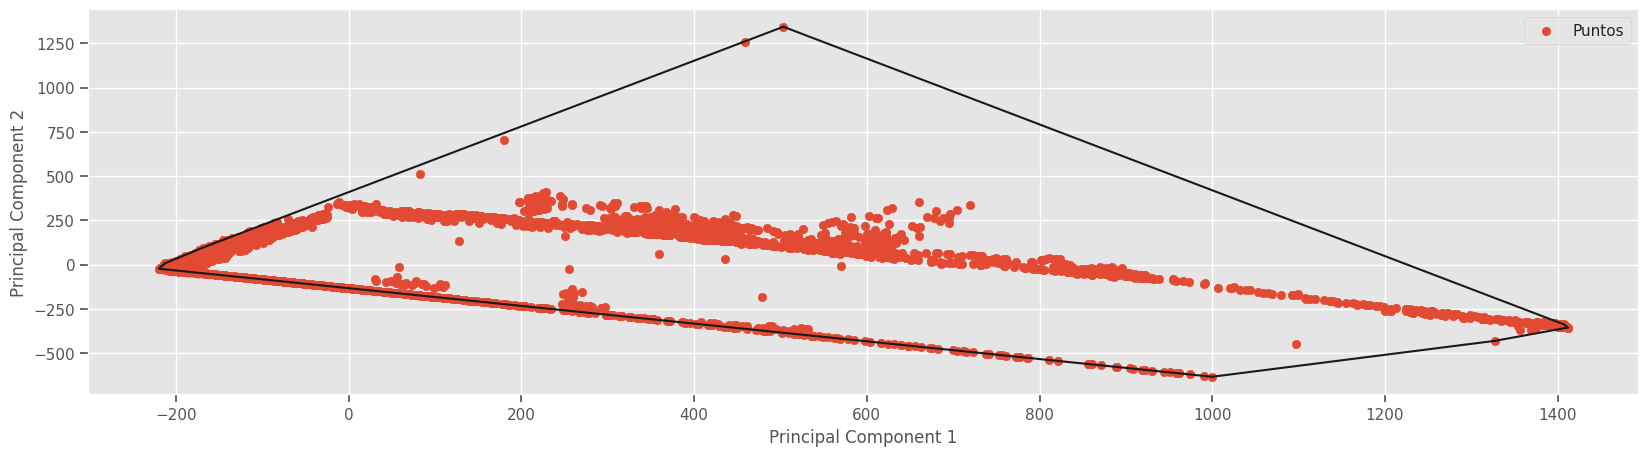

In [ ]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(X_train_o)

# Calcular la envoltura convexa de los datos proyectados
hull = ConvexHull(data_2d)

# Graficar los puntos y la envoltura convexa
plt.scatter(data_2d[:, 0], data_2d[:, 1], label='Puntos')
for simplex in hull.simplices:
    plt.plot(data_2d[simplex, 0], data_2d[simplex, 1], 'k-')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

As seen in the previous dataset we can infer from this graph that there can be a linear separability

### Perceptron

In [ ]:
#Creamos el Perceptron
perceptron = Perceptron(tol=1e-3, random_state=0, eta0=0.1)

#Pasamos los datos de entrenamiento
perceptron.fit(X_train_o, y_train_o)

#y_test = perceptron.predict(X_test_o)
#print(y_test)

#Meedimos la precisión
training_predictions = perceptron.predict(X_train_o)
accuracy = accuracy_score(y_train_o, training_predictions)
print(accuracy)

0.9711408571779443


In [ ]:
#Creamos el Perceptron
perceptron = Perceptron(tol=1e-3, random_state=0, eta0=0.1)

#Pasamos los datos de entrenamiento
perceptron.fit(X_test1_o, y_test1_o)

#y_test = perceptron.predict(X_test_o)
#print(y_test)

#Meedimos la precisión
training_predictions = perceptron.predict(X_test1_o)
accuracy = accuracy_score(y_test1_o, training_predictions)
print(accuracy)

0.9771106941838649


In [ ]:
#Creamos el Perceptron
perceptron = Perceptron(tol=1e-3, random_state=0, eta0=0.1)

#Pasamos los datos de entrenamiento
perceptron.fit(X_test2_o, y_test2_o)

#y_test = perceptron.predict(X_test_o)
#print(y_test)

#Meedimos la precisión
training_predictions = perceptron.predict(X_test2_o)
accuracy = accuracy_score(y_test2_o, training_predictions)
print(accuracy)

0.9840032813781788


Since the Perceptron accuracy was not 100% it is likely that this dataset is not linearly separable. 

## Is this dataset linearly separable?

As we have seen, different methods have given us different answers. One is most likely to believe that this dataset is not linearly separable due to the accuracy of the Perceptron

# Why is the code working?

In [ ]:
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/


class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        #We define the colors of the associated classes, where red is for the forged banknotes and blue for the genuine ones
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)

    # train (optimization part)
    def fit(self, data):
        self.data = data
        # We define this dictionary to save the values { ||w||: [w,b] }
        opt_dict = {}

        # Transforms that we are going to apply to the vector w to optimize w
        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        #Reconstruction of the dataset (only the characteristic) where the first value is the label and then the vectors that represent the features, to take max and min feature value
        #of the dataset take all the features
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1

        #We start looking a good value using big steps (0.1), after we find a good one we use smaller steps (0.01) and then we repeat the process 
        
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]

        
        
        # extremely expensive
        b_range_multiple = 5
        # we dont need to take as small of steps 
        # with b as we do w
        b_multiple = 5
        # latest_optimum is going to be the first element in vector w
        latest_optimum = self.max_feature_value*10


        #We want the minimum magnitude of w and the maximum b

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            #While is going to when it is not optimized. That is the reason why in previous lines we defined optimized as false
            while not optimized:
              #we take b from -the maximum value to the maximum value in steps 
              #of 5 times the steps of w
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                      #We multiply w with the vectors of transformation component to component
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                          #for all data we are going to verify, so if there is 
                          #at least one i that doesn't meet the condition, then we return false
                            for xi in self.data[i]:
                                #we only change the label's name
                                yi=i
                                # Verifiy constraints, if it doesn't meet the 
                                #condition then it doesn't save the value
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            # Computes norm for the ones who meet the condition
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                #w gives the value of the slope and the distance between the supports
                #It suffices to check the positive values to study all possible options. That happens in view of the fact that when w < 0 there will repeated cases.
                if w[0] < 0:
                  # it appears  "Optimized a step" when we finish the while of the first step
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            #norms is vector of all the values of opt_dict organized from the smallest
            #to the biggest, so norms[0] is going to be the smallest 
            #so we take the smallest w of the list and we use it to define latest_optimum that 
            #is going to be the new component of w
            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]] #el de norma más chiquita
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            #opt_choice[0] is w and opt_choice[0][0] is the fisrt component of w
            latest_optimum = opt_choice[0][0]+step*2


            
            
    #Gives the data to predict and returns the label of it
    def predict(self,features):
        # The classification depends on the sign of x.w+b (x:np.array(features) w:self.w  b:self.b)
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
    #We add two lines: if x.w+b is different from 0 then we mark it with a star of the corresponging color
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification

    #Now we define a function that let us see the data in the corresponding color and the decision boundary
    def visualize(self):
      [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
      
      def hyperplane(x,w,b):
        return (-w[0]*x-b) / w[1]

      #We define the graph domain depending on the smallest and biggest value of x
      range = (self.min_feature_value*0.9,self.max_feature_value*1.1)
      hyp_x_min=range[0]
      hyp_x_max=range[1]

      sv1=hyperplane(hyp_x_min, self.w, self.b)
      sv2=hyperplane(hyp_x_max, self.w, self.b)
      self.ax.plot([hyp_x_min,hyp_x_max],[sv1,sv2], "g")

      plt.show()

Here are some examples of the implementation of the code

In [ ]:
#We create a dataset

data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

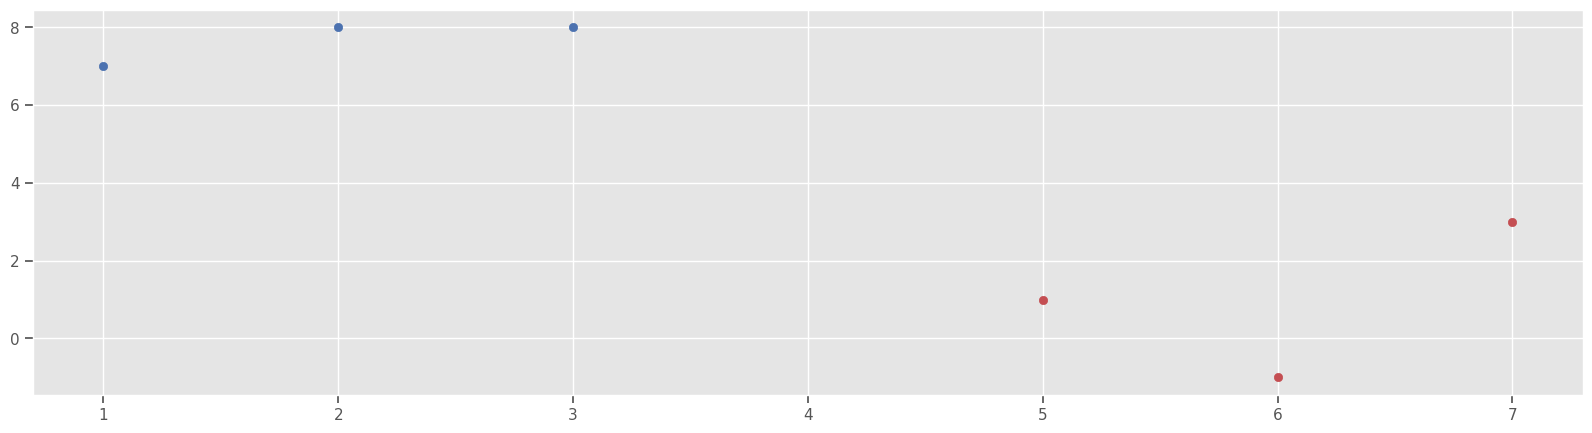

In [ ]:
#Visualize it
plt.scatter(data_dict[-1][:, 0], data_dict[-1][:, 1], c = 'b')
plt.scatter(data_dict[1][:, 0], data_dict[1][:, 1], c = 'r')

Optimized a step.
Optimized a step.
Optimized a step.


1.0

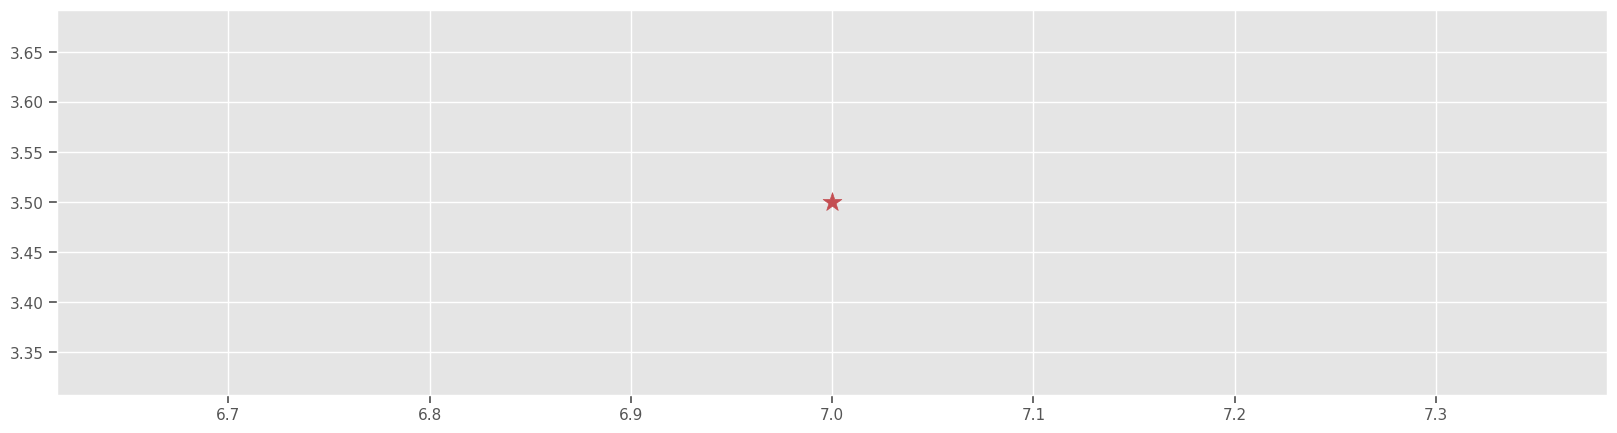

In [ ]:
svm1 = Support_Vector_Machine()
svm1.fit(data_dict)
svm1.predict([7,3.5])

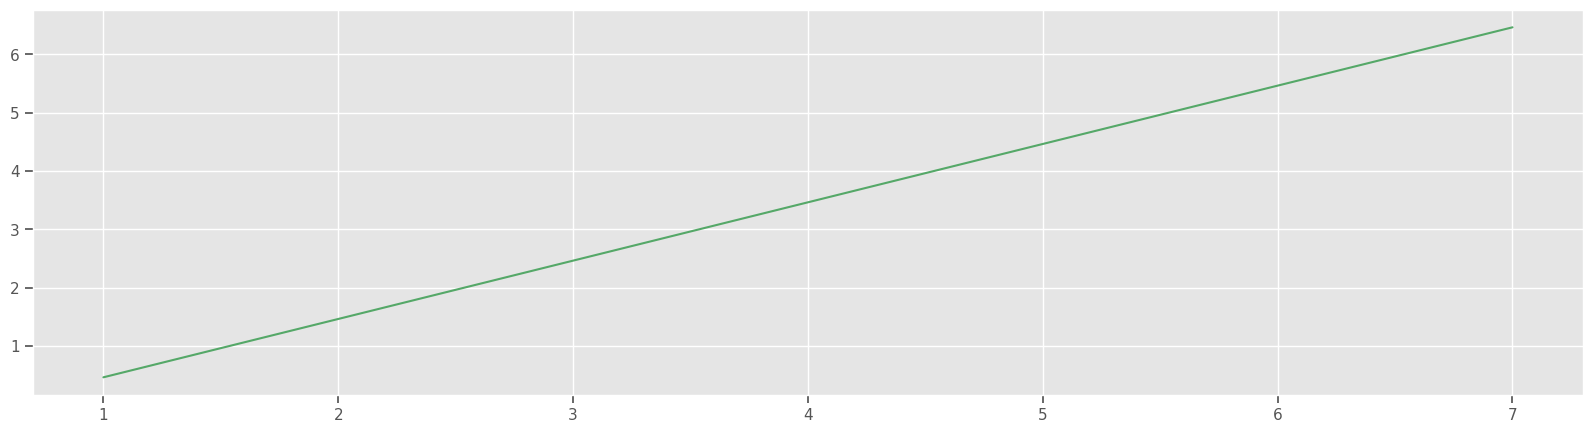

In [ ]:
#We graph the separating line
w_1 = svm1.w[0]
w_2 = svm1.w[1]
b_opt = svm1.b 
x = np.linspace(1, 7, 2)
y = (b_opt - w_1 * x) / w_2

plt.plot(x, y, c = 'g')
plt.show()

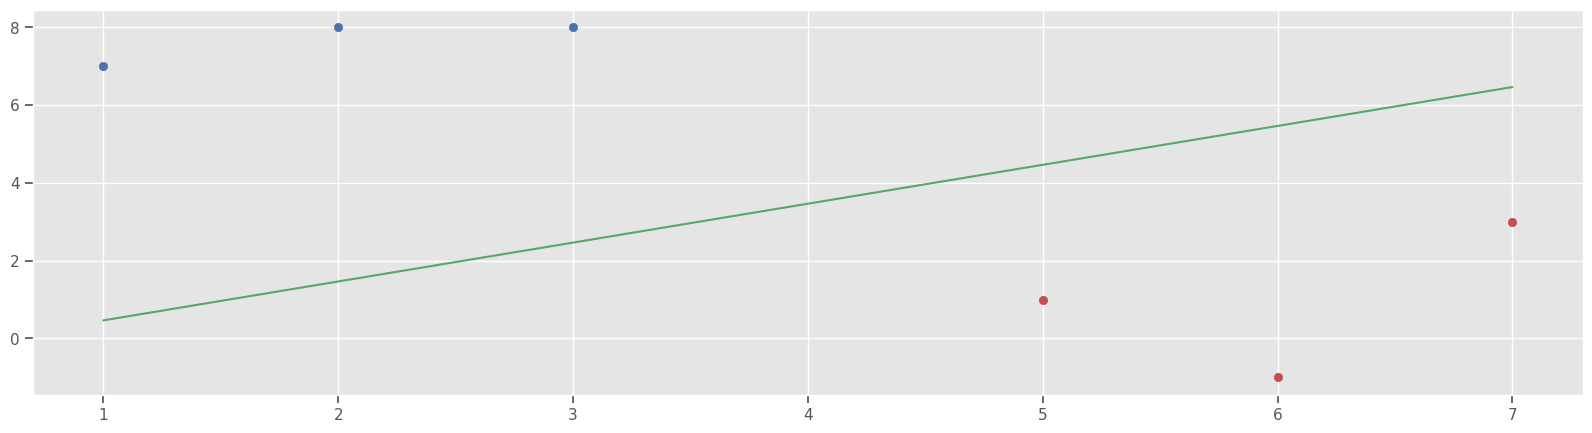

In [ ]:
# And now we see it separating
plt.scatter(data_dict[-1][:, 0], data_dict[-1][:, 1], c = 'b')
plt.scatter(data_dict[1][:, 0], data_dict[1][:, 1], c = 'r')

plt.plot(x, y, c = 'g')

plt.show()

#References



1.   Jolliffe, I. T. (2011). Principal Component Analysis (2nd Edition). Springer.
2.   Cortes, C., & Vapnik, V. (1995). Support-vector networks. Machine Learning, 20(3), 273-297.
3. Burges, C. J. (1998). A tutorial on support vector machines for pattern recognition. Data Mining and Knowledge Discovery, 2(2), 121-167. 
4. Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: data mining, inference, and prediction (2nd ed.). Springer.

